In [ ]:
import math
from math import factorial as f
conf_cnt = []

In [ ]:
def permu(s):
    ssize = 1
    n = sum(s)
    for x in s:
        ssize *= int(f(n) / f(x) / f(n-x))
        n -= x
    return ssize
def multiplication(s):
    ssize = 1
    for x in s:
        ssize *= conf_cnt[x]
    return ssize
def worst(s):
    ssize = len(s)
    for x in s:
        ssize *= int(math.pow(2, x-1))*math.factorial(x)
    return ssize

def combination(K):
    # init
    S_K = [[0,] for x in range(K+1)]
    S_K[0].clear()
    S_K[0].append([])
    counter = 0
    global conf_cnt
    conf_cnt = [0 for x in range(K+1)]
    
    # start
    for k in range(1,K+1):
        S_K[k].clear()

        for i in range(1,k+1):
            for prev in S_K[k-i]:
                tmp = [i,]
                tmp.extend(prev)
                S_K[k].append(tmp)
        print("s", k, ', length:', len(S_K[k]))
        print("all possibility of PCf", S_K[k])
        sizeList = list(map(permu , S_K[k]))
        print(sizeList)
        conf_cnt[k] = sum(sizeList)
        print("all possibility cnt if funcs are fully parallelizable:", conf_cnt[k])
        print("actual cnt", list(map(multiplication , S_K[k])))
        print("worst cnt", list(map(worst , S_K[k])))
        print()
        counter += len(S_K[k])
    print("\n====================")
    print("sum of length:", counter)


In [ ]:
if __name__ == '__main__':
    combination(6)

In [4]:
import numpy as np
runtime = np.genfromtxt('algo1.csv',delimiter=',')
mean = np.mean(runtime, axis=1, keepdims=True)
standard_deviation = np.std(runtime, axis=1, keepdims=True)
print(runtime)
distance_from_mean = abs(runtime - mean)
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * standard_deviation
for i in range(runtime.shape[0]):
    for j in range(runtime.shape[1]):
        if not_outlier[i][j] == False:
            runtime[i][j] = np.mean(runtime[i][not_outlier[i]])
            
print(runtime)
newMean = np.mean(runtime, axis=1)
Max = np.max(runtime, axis=1)-newMean
Min = newMean - np.min(runtime, axis=1)
print(newMean)
print(Max)
print(Min)
err = np.zeros((2, len(Max)))
err[0] = Min
err[1] = Max
print(err)

[[  21.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.
     4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.
     4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.
     4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.
     4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.
     4.    4.    4.    4.    4.    4.    3.    4.    4.    4.    4.    4.
     4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.
     4.    3.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.
     4.    4.    4.    4.]
 [   9.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.
     8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.
     9.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.
     8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.
     8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.    8.
     8.    

In [5]:
import matplotlib.pyplot as plt
#%matplotlib notebook

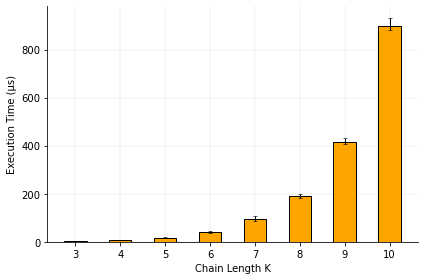

In [8]:
plt.bar(range(3,11), newMean, width=0.5, color='orange', edgecolor='black')
plt.errorbar(range(3,11), newMean, yerr=err, fmt='none', 
             capsize=2, capthick=0.6, elinewidth=1, color='black')
plt.ylabel('Execution Time (µs)')
plt.xlabel('Chain Length K')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.rcParams['axes.axisbelow'] = True
#plt.title('Algorithm1: Cluster Size Enumeration')
plt.tight_layout()
plt.savefig('algo1.png', dpi=2000)

In [13]:
from scipy.io import savemat
mdic = {"algo1_avg": newMean, 
        "algo1_err_min": Min, 
        "algo1_err_max": Max}
savemat("ppc_algo1_runtime.mat", mdic)

In [12]:
mdic

{'avg': array([  3.97979798,   8.        ,  17.02020202,  38.7173913 ,
         93.45360825, 189.22916667, 415.91919192, 899.1122449 ]),
 'err_min': array([ 0.97979798,  0.        ,  0.02020202,  1.7173913 ,  8.45360825,
         5.22916667,  8.91919192, 16.1122449 ]),
 'err_max': array([2.02020202e-02, 0.00000000e+00, 9.79797980e-01, 5.28260870e+00,
        1.35463918e+01, 1.17708333e+01, 1.70808081e+01, 3.38877551e+01])}